In [1]:
import numpy as np 
import os, sys, glob, csv
import pandas as pd
import time, datetime
from datetime import datetime
from pandas import DataFrame
import matplotlib.pyplot  as plt 
import matplotlib as mpl
from astropy.table import Table,vstack,unique,Column
from astropy.time import Time
import pylab as py


In [15]:
fp = '/home/sarah/ADRstudy/'

mis = fp+'202205_HA_QUENTIN_WX12.mis'
# legs = fp+'202108_HA_DARWIN_INIT.csv'

def get_leginfo(misfile, utc_date):
    
    leginfo =[]

    with open(misfile, 'r') as rf:
        for line_file in rf:

            if ("Leg" in line_file) & ("Start" in line_file):
                st = line_file.split("Start: ")[1].split('Leg Dur:')[0]
#                 try:
                obj = line_file.split("(")[1].split(')')[0]
#                 except:
#                     print(line_file)
#                     obj = line_file
                dur = line_file.split('Leg Dur: ')[1].split(' Alt.:')[0]
                alt = line_file.split(' Alt.: ')[1].split(' ft')[0]
                if '/' in alt:
                    alt = int(np.mean([np.int(alt.split('/')[-1]),np.int(alt.split('/')[0])]))
                leginfo.append((pd.to_datetime(utc_date+' '+st.strip()),obj.strip(),dur.strip(),str(alt)))
    return leginfo

leginfo = get_leginfo(mis, '2022-06-02')
print(leginfo)

[(Timestamp('2022-06-02 03:30:00'), 'Departure', '00:02:20', '10000'), (Timestamp('2022-06-02 03:35:12'), 'PSP', '00:10:01', '35000'), (Timestamp('2022-06-02 03:45:41'), 'Dead Leg', '00:14:00', '35000'), (Timestamp('2022-06-02 04:00:02'), 'Setup', '00:30:00', '37000'), (Timestamp('2022-06-02 04:30:43'), 'PolarisFlare-1', '01:50:00', '39000'), (Timestamp('2022-06-02 06:22:24'), 'NGC4736', '00:56:00', '41000'), (Timestamp('2022-06-02 07:21:47'), 'G24_F1', '02:53:00', '42000'), (Timestamp('2022-06-02 10:16:33'), '4 Vesta', '01:10:00', '43000'), (Timestamp('2022-06-02 11:28:47'), 'cage', '00:05:00', '43000'), (Timestamp('2022-06-02 11:33:59'), 'Approach via ETHER', '00:30:32', '43000')]


/tmp/ipykernel_63183/1083962463.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  alt = int(np.mean([np.int(alt.split('/')[-1]),np.int(alt.split('/')[0])]))


In [17]:
#(df.fr-df.to).astype('timedelta64[h]')
#
times=[]
alts = []

for i,l in enumerate(leginfo):
    mins = pd.Timedelta(leginfo[i+1][0]-leginfo[i][0]).seconds/60.
    print(i,mins,l[3])
    times.append(leginfo[i][0])
    while int(mins) > 2:
        times.append(leginfo[i][0]+ pd.Timedelta(minutes=1))
        alts.append(l[3])
        mins=int(mins)-1
    print(int(mins),len(times))

    
    
times   

0 5.2 10000
2 4
1 10.483333333333333 35000
2 13
2 14.35 35000
2 26
3 30.683333333333334 37000
2 55
4 111.68333333333334 39000
2 165
5 59.38333333333333 41000
2 223
6 174.76666666666668 42000
2 396
7 72.23333333333333 43000
2 467
8 5.2 43000
2 471


IndexError: list index out of range

In [18]:
leginfo
# [(Timestamp('2022-06-02 03:30:00'), 'Departure', '00:02:20', '10000'),
#  (Timestamp('2022-06-02 03:35:12'), 'PSP', '00:10:01', '35000'),
#  (Timestamp('2022-06-02 03:45:41'), 'Dead Leg', '00:14:00', '35000'),
#  (Timestamp('2022-06-02 04:00:02'), 'Setup', '00:30:00', '37000'),
#  (Timestamp('2022-06-02 04:30:43'), 'PolarisFlare-1', '01:50:00', '39000'),
#  (Timestamp('2022-06-02 06:22:24'), 'NGC4736', '00:56:00', '41000'),
#  (Timestamp('2022-06-02 07:21:47'), 'G24_F1', '02:53:00', '42000'),
#  (Timestamp('2022-06-02 10:16:33'), '4 Vesta', '01:10:00', '43000'),
#  (Timestamp('2022-06-02 11:28:47'), 'cage', '00:05:00', '43000'),
#  (Timestamp('2022-06-02 11:33:59'), 'Approach via ETHER', '00:30:32', '43000')]


[(Timestamp('2022-06-02 03:30:00'), 'Departure', '00:02:20', '10000'),
 (Timestamp('2022-06-02 03:35:12'), 'PSP', '00:10:01', '35000'),
 (Timestamp('2022-06-02 03:45:41'), 'Dead Leg', '00:14:00', '35000'),
 (Timestamp('2022-06-02 04:00:02'), 'Setup', '00:30:00', '37000'),
 (Timestamp('2022-06-02 04:30:43'), 'PolarisFlare-1', '01:50:00', '39000'),
 (Timestamp('2022-06-02 06:22:24'), 'NGC4736', '00:56:00', '41000'),
 (Timestamp('2022-06-02 07:21:47'), 'G24_F1', '02:53:00', '42000'),
 (Timestamp('2022-06-02 10:16:33'), '4 Vesta', '01:10:00', '43000'),
 (Timestamp('2022-06-02 11:28:47'), 'cage', '00:05:00', '43000'),
 (Timestamp('2022-06-02 11:33:59'), 'Approach via ETHER', '00:30:32', '43000')]

In [20]:
lx = list(list(zip(*leginfo))[0])   
ln = list(list(zip(*leginfo))[1])
ld = list(list(zip(*leginfo))[2])

lx,ln,ld

([Timestamp('2022-06-02 03:30:00'),
  Timestamp('2022-06-02 03:35:12'),
  Timestamp('2022-06-02 03:45:41'),
  Timestamp('2022-06-02 04:00:02'),
  Timestamp('2022-06-02 04:30:43'),
  Timestamp('2022-06-02 06:22:24'),
  Timestamp('2022-06-02 07:21:47'),
  Timestamp('2022-06-02 10:16:33'),
  Timestamp('2022-06-02 11:28:47'),
  Timestamp('2022-06-02 11:33:59')],
 ['Departure',
  'PSP',
  'Dead Leg',
  'Setup',
  'PolarisFlare-1',
  'NGC4736',
  'G24_F1',
  '4 Vesta',
  'cage',
  'Approach via ETHER'],
 ['00:02:20',
  '00:10:01',
  '00:14:00',
  '00:30:00',
  '01:50:00',
  '00:56:00',
  '02:53:00',
  '01:10:00',
  '00:05:00',
  '00:30:32'])

In [37]:
# %%timeit
hkpath= fp+'/hk/'
mrf = hkpath+'06022022/220602_LHe_Flight-mrf.tsv'
hk =  pd.read_csv(mrf, delim_whitespace=True,
                      names=['DATA','col','Time_sec','Temp_K','Resistence',
                             'Voltage','Current','mmddyyyy','hhmmss'])

timedelta = pd.Timedelta(0,unit= 'm')
hk['time_str'] = hk.apply(lambda x: x['mmddyyyy']+' '+x['hhmmss'],axis=1)
hk['timestamp'] = pd.to_datetime(hk['time_str'])-timedelta
# hk['timestamp'] = hk['timestamp'].dt.tz_localize('US/pacific').dt.tz_convert('utc')
#nhk = hk.set_index('timestamp')

nhk= hk.set_index('timestamp')
nhk = nhk.resample("20s").mean()
nhk["C_120"] = nhk["Current"].shift(6)

nhk["AmpHour"] = 3600*(nhk["Current"] - nhk["C_120"])/120


hk.info(),nhk.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATA        2229 non-null   object        
 1   col         2229 non-null   object        
 2   Time_sec    2229 non-null   float64       
 3   Temp_K      2229 non-null   float64       
 4   Resistence  2229 non-null   float64       
 5   Voltage     2229 non-null   float64       
 6   Current     2229 non-null   float64       
 7   mmddyyyy    2229 non-null   object        
 8   hhmmss      2229 non-null   object        
 9   time_str    2229 non-null   object        
 10  timestamp   2229 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 191.7+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1958 entries, 2022-06-02 18:28:20 to 2022-06-03 05:20:40
Freq: 20S
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---

(None, None)

In [38]:
len(hk.time_str.values),hk.timestamp.values[0],(hk.timestamp.values[-1]),len(hk.timestamp.values)

(2229,
 numpy.datetime64('2022-06-02T18:28:22.000000000'),
 numpy.datetime64('2022-06-03T05:20:51.000000000'),
 2229)

In [39]:
path= fp+'/400Hz_sensor_data/'
flights = ['880','881','882','883','884','885']

fname = '881.csv'
F880 = path+fname
jt = pd.read_csv(F880, delimiter=',',
                 names=['unixdatetime','nanosec','ta_ex','ta_xel','ta_los','si_el','si_xel','si_los'],skiprows=0)

#the data per column is:
# Unix-Time Seconds,Nanoseconds,
# Accels in EL,XEL,LOS at TA center of gravity
# Accels EL,XEL,LOS at SI flange
# Unit is m s^-2



In [40]:
jt.head()

,unixdatetime,nanosec,ta_ex,ta_xel,ta_los,si_el,si_xel,si_los
0,1654222446,804574600,-0.023353,7.577155,-6.188050,-0.009937,7.574255,-6.213499
1,1654222446,807074100,-0.016264,7.569679,-6.184926,-0.048068,7.587528,-6.197619
2,1654222446,809574100,-0.009555,7.568437,-6.179207,-0.056323,7.573750,-6.204784
3,1654222446,812074100,-0.019806,7.581664,-6.177409,-0.004706,7.581382,-6.202508
4,1654222446,814574100,-0.018918,7.582676,-6.178657,-0.013850,7.586293,-6.206468


In [41]:
import datetime

timestamp = jt.unixdatetime.values#1654121234  #2022-06-01 15:07:14. 
htimestamp = []
isotime = []
nanosec = jt['nanosec'].values
hmstime = []
for i,t in enumerate(timestamp):
    #print(i)
    
    value = datetime.datetime.fromtimestamp(t)
    hmstime.append(f"{value:%Y-%m-%d %H:%M:%S}")
    
    if i == 0 :
        bd = int(value.day)
        #print(bd)
        h = (int(value.hour)*3600+int(value.minute)*60+int(value.second))/3600.
    
    try:
        value = value.replace(second=value.second,microsecond = int(np.round(nanosec[i]/1000,0)))
    except:
        value = value.replace(second=value.second+int(1),microsecond =0)
        #print(i,value,nanosec[i])
    isotime.append(f"{value:%Y-%m-%d %H:%M:%S.%f}")  ###------------> ADDED NANOSECOND 
    #print(value)
    hms = str(value).split(' ')[-1].split(':')
    #print(hms)
    if bd == int(value.day):
        
        htime = ((int(hms[0])*3600+int(hms[1])*60+float(hms[2]))/3600.)-h
        htime0 = htime 
    else:
        htime = htime0 + ((int(hms[0])*3600+int(hms[1])*60+float(hms[2]))/3600.)-h
    htimestamp.append(htime)
    
# print(f"{value:%Y-%m-%d %H:%M:%S}")
# print(f"{value:%H:%M:%S}")
# len(jt.unixdatetime.values),  len(np.unique(jt.unixdatetime))
# np.round(12.999999,0),int(np.round(999999600/1000,1))
jt['ymdhms'] = hmstime
jt['isotime']= isotime
jt['hour']= htimestamp
jt.to_csv('isotime_F'+fname, encoding='utf-8', index=False)

In [43]:
value = datetime.fromtimestamp(1654121234)
value = value.replace(second=value.second,microsecond=852213)
f"{value:%Y-%m-%d %H:%M:%S.%f}",int(value.day),datetime.fromtimestamp(1654121234).second


AttributeError: module 'datetime' has no attribute 'fromtimestamp'

In [44]:
import plotly.graph_objs as go
import plotly.express as px

df = pd.read_csv(fp+'isotime_F881.csv',skiprows=1,
                      names=['unixdatetime', 'nanosec', 'ta_ex', 'ta_xel', 'ta_los', 'si_el',
       'si_xel', 'si_los', 'isotime','hour','ymdhms'],parse_dates=[8,10])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14668000 entries, 0 to 14667999
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   unixdatetime  int64         
 1   nanosec       int64         
 2   ta_ex         float64       
 3   ta_xel        float64       
 4   ta_los        float64       
 5   si_el         float64       
 6   si_xel        float64       
 7   si_los        float64       
 8   isotime       datetime64[ns]
 9   hour          float64       
 10  ymdhms        datetime64[ns]
dtypes: datetime64[ns](2), float64(7), int64(2)
memory usage: 1.2 GB


In [45]:
ndf = df.set_index('isotime')
per17sec = pd.DataFrame()

per17sec['si_el'] = ndf.si_el.resample('17s').mean()
per17sec['si_xel'] = ndf.si_xel.resample('17s').mean()
per17sec['si_los'] = ndf.si_los.resample('17s').mean()

# len(df.si_los.values),len(per17sec['si_los']),

ndf.head()

,unixdatetime,nanosec,ta_ex,ta_xel,ta_los,si_el,si_xel,si_los,hour,ymdhms
isotime,,,,,,,,,,
2022-06-02 19:14:06.804575,1654222446,804574600,-0.023353,7.577155,-6.188050,-0.009937,7.574255,-6.213499,0.000223,2022-06-02 19:14:06
2022-06-02 19:14:06.807074,1654222446,807074100,-0.016264,7.569679,-6.184926,-0.048068,7.587528,-6.197619,0.000224,2022-06-02 19:14:06
2022-06-02 19:14:06.809574,1654222446,809574100,-0.009555,7.568437,-6.179207,-0.056323,7.573750,-6.204784,0.000225,2022-06-02 19:14:06
2022-06-02 19:14:06.812074,1654222446,812074100,-0.019806,7.581664,-6.177409,-0.004706,7.581382,-6.202508,0.000226,2022-06-02 19:14:06
2022-06-02 19:14:06.814574,1654222446,814574100,-0.018918,7.582676,-6.178657,-0.013850,7.586293,-6.206468,0.000226,2022-06-02 19:14:06


In [46]:
per17sec.info(),hk.info(),ndf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2158 entries, 2022-06-02 19:14:01 to 2022-06-03 05:25:10
Freq: 17S
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   si_el   2158 non-null   float64
 1   si_xel  2158 non-null   float64
 2   si_los  2158 non-null   float64
dtypes: float64(3)
memory usage: 67.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATA        2229 non-null   object        
 1   col         2229 non-null   object        
 2   Time_sec    2229 non-null   float64       
 3   Temp_K      2229 non-null   float64       
 4   Resistence  2229 non-null   float64       
 5   Voltage     2229 non-null   float64       
 6   Current     2229 non-null   float64       
 7   mmddyyyy    2229 non-null   object        
 8   hhmmss      2229 non-null   ob

(None, None, None)

In [47]:
per17sec.index

DatetimeIndex(['2022-06-02 19:14:01', '2022-06-02 19:14:18',
               '2022-06-02 19:14:35', '2022-06-02 19:14:52',
               '2022-06-02 19:15:09', '2022-06-02 19:15:26',
               '2022-06-02 19:15:43', '2022-06-02 19:16:00',
               '2022-06-02 19:16:17', '2022-06-02 19:16:34',
               ...
               '2022-06-03 05:22:37', '2022-06-03 05:22:54',
               '2022-06-03 05:23:11', '2022-06-03 05:23:28',
               '2022-06-03 05:23:45', '2022-06-03 05:24:02',
               '2022-06-03 05:24:19', '2022-06-03 05:24:36',
               '2022-06-03 05:24:53', '2022-06-03 05:25:10'],
              dtype='datetime64[ns]', name='isotime', length=2158, freq='17S')

In [48]:
per17sec.reset_index(inplace=True)
per17sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   isotime  2158 non-null   datetime64[ns]
 1   si_el    2158 non-null   float64       
 2   si_xel   2158 non-null   float64       
 3   si_los   2158 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 67.6 KB


In [49]:
import plotly.graph_objs as go
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots

primary_yax_title= 'SI LOS velocity [m/s]'
secondary_yax_title= 'ADR burn rate [A/h]'
xax_title = 'Datetime [UTC]'
plot_title = 'F881-QUENTIN 400 Hz sensor data'

trace1 = go.Scatter(
    y=per17sec['si_xel'],
    x=per17sec['isotime'],
    name='Si Cross Elevation [m/s]',
    yaxis='y1'

)
trace2 = go.Scatter(
    y=per17sec['si_el'],
    x=per17sec['isotime'],
    name='Si Elevation [m/s]',
    yaxis='y2'

)
# title = '400 Hz sensor data'
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 1500, title = plot_title,xaxis=dict(tickangle=-90
    ))
# fig['layout'].update({"title": '400 Hz sensor data',
#                    "xaxis": {"title":"datetime"},
#                    "yaxis": {"title":"SI filange XEL velocity [m/s]"},
#                    "showlegend": False})

# Set x-axis title
fig.update_xaxes(title_text=xax_title)

# Set y-axes titles
fig.update_yaxes(title_text=primary_yax_title, secondary_y=False)
fig.update_yaxes(title_text=secondary_yax_title, secondary_y=True)


iplot(fig)

#---------------------------------------------

primary_yax_title= 'SI LOS velocity [m/s]'
secondary_yax_title= 'ADR burn rate [A/h]'
xax_title = 'Datetime [UTC]'
plot_title =  'F881-QUENTIN 400 Hz sensor data'

trace1 =  go.Scatter(
    y=per17sec['si_los'],
    x=per17sec['isotime'],
    yaxis='y1'

)
trace2 = go.Scatter(
    y=nhk['AmpHour'],
    x=nhk['timestamp'],
    yaxis='y2'

)
# title = '400 Hz sensor data'
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 1500, title = plot_title,xaxis=dict(tickangle=-90
    ))
# fig.update_layout({"title":plot_title,
#                    "xaxis": {"title":"datetime"},
#                    "yaxis": {"title":"SI filange XEL velocity [m/s]"},yaxis_range=[-4,4]
#                    "showlegend": False})

# Set x-axis title
fig.update_xaxes(title_text=xax_title)

# Set y-axes titles
fig.update_yaxes(title_text=primary_yax_title, secondary_y=False)
fig.update_yaxes(title_text=secondary_yax_title, secondary_y=True,range=[-2,4])

iplot(fig)
    
    #------------- Single plot --------------------
# fig = go.Figure(data=go.Scatter(x=per17sec['isotime'], 
#                                 y=per17sec['si_xel'],
#                                 marker_color='black', text='sensor'))

# fig.update_layout({"title": '400 Hz sensor data',
#                    "xaxis": {"title":"datetime"},
#                    "yaxis": {"title":"SI filange XEL velocity [m/s]"},
#                    "showlegend": False})

# fig.show()

KeyError: 'timestamp'

In [50]:
nhk.reset_index(inplace=True)
nhk.keys()

Index(['timestamp', 'Time_sec', 'Temp_K', 'Resistence', 'Voltage', 'Current',
       'C_120', 'AmpHour'],
      dtype='object')

In [51]:
nhk.timestamp.values


array(['2022-06-02T18:28:20.000000000', '2022-06-02T18:28:40.000000000',
       '2022-06-02T18:29:00.000000000', ...,
       '2022-06-03T05:20:00.000000000', '2022-06-03T05:20:20.000000000',
       '2022-06-03T05:20:40.000000000'], dtype='datetime64[ns]')

NameError: name 'njt' is not defined

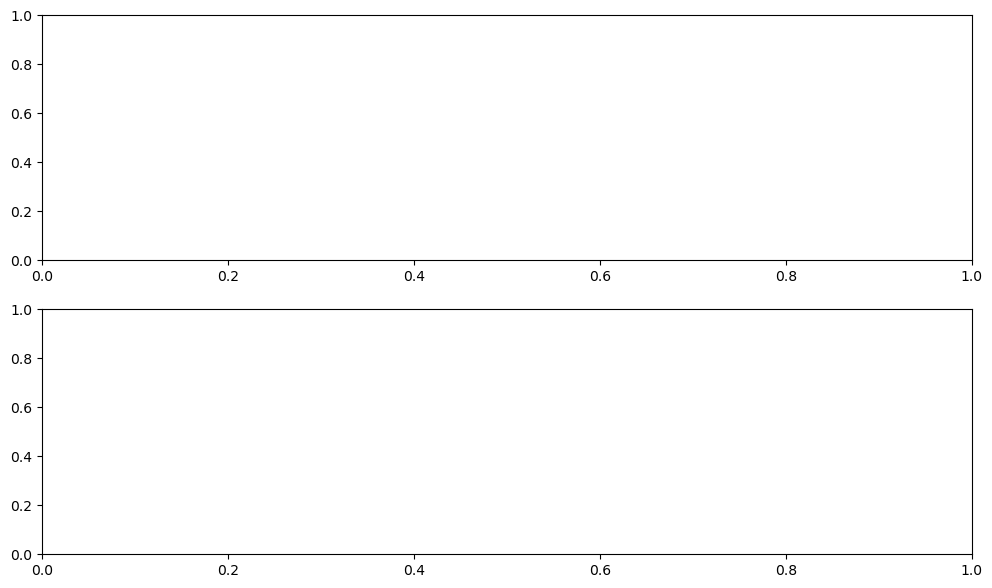

In [53]:
# fig = plt.figure(figsize=(20, 4))

# plt.plot(jt.si_el,linestyle='-.')
# plt.plot(jt.si_xel,linestyle='-.',color='orange')
# plt.plot(jt.si_los,linestyle='-.',color='green')
from datetime import datetime

def fix_time(date_time):
    try:
        string = date_time.strftime("%H:%M")

    except:
        string = date_time
    string = string.split(":")
    string[-1] = '00'
    string[-2] = '00'
    string = ':'.join(string)

    return datetime.fromisoformat(string)


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,7))
ax = axes[0]

upper_lim = fix_time(max(njt.index))
lower_lim = fix_time(min(njt.index))

ax.set_xlim(lower_lim, upper_lim)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

fmt_hour = mdates.HourLocator(interval=2)
ax.xaxis.set_major_locator(fmt_hour)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

fmt_15min = mdates.MinuteLocator(interval=30)
ax.xaxis.set_minor_locator(fmt_15min)

# ax.plot(njt.index, hk["Current"], '.',ls='',markersize=0.4)
ax.plot(njt.index, njt.si_el, '.',ls='',markersize=0.4,color='red')
# ax.plot(njt.index, njt.si_xel, '.',ls='',markersize=0.4,color='green')
# ax.plot(njt.index, njt.si_los, '.',ls='',markersize=0.4,color='cyan')


# ax.set_ylabel('ADR current [A]',fontsize=14,color = 'blue')
ax.set_ylabel('SI [m/s]',fontsize=14,color = 'blue')

ax.set_xlabel('MCSTIME [UTC]]',fontsize=11)

ax.tick_params(which='major', length=6, width=1., direction='in')
ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction='in')

ax2 = ax.twinx()
# secondary y-axis label
ax2.set_ylabel('Alt. [ft]',fontsize=14,color = 'orange')
ax2.set_ylim([10000,45000])
# ax2.plot(njt.index,njt.AmpHour,color='orange', marker = '.',markersize=1.0,ls='')
x_ax = ax.twiny()
x_ax.set_xlim(lower_lim, upper_lim)
x_ax.set_xticklabels([])
x_ax.minorticks_on()
x_ax.tick_params(which='major', length=6, width=1.0, direction='in')
x_ax.xaxis.set_major_locator(fmt_hour)
x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction='in') 
x_ax.xaxis.set_minor_locator(fmt_15min)
     
    
# ####################### vertical lines ########################

lx = list(list(zip(*leginfo))[0])   
ln = list(list(zip(*leginfo))[1])
ld = list(list(zip(*leginfo))[2])
la = list(list(zip(*leginfo))[3])

from matplotlib.pyplot import text

for i,x in enumerate(lx):
    if i<len(lx)-1:
        print(i,x,ln[i],lx[i],lx[i+1],la[i])
#     ax.axvline(x=x,c="red",linewidth=1,zorder=0, clip_on=False)
        ax.axvline(x='2022-06-02 03:30:00', ymin=0., ymax=0.75)
        ax2.axhline(la[i],xmin=lx[i], xmax=lx[i+1])
#             ax2.axvline(x=x,ymin=0,ymax=3.5,c="red",linewidth=1, zorder=0,clip_on=False)
#     if i>2:
#         text(x, 19.75, ln[i], rotation=90, verticalalignment='center',fontsize=12)
#     elif i==2:

#         text(x, 19.75, ln[0]+'->'+ln[1]+'->'+ln[2], rotation=90, verticalalignment='center',fontsize=12)
# ##############################################################

    
    
plt.subplots_adjust(hspace=0.5)
